# 09_vsags_vmags_compare_tax

This document compares both host phylogeny from SAGs and MAGs. Order classification is used for comparison.

## Load packages and data

In [1]:
# load packages
import pandas as pd
import os
import sys
import csv
import numpy as np
import matplotlib
import glob
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# load functions
def split_classification(df):
    df[['domain','phyla','class','order','family','genus','species']] = df.classification.str.split(';', expand=True)
    df['domain'] = df['domain'].str.replace('d__', '')
    df['phyla'] = df['phyla'].str.replace('p__', '')
    df['class'] = df['class'].str.replace('c__', '')
    df['order'] = df['order'].str.replace('o__', '')
    df['family'] = df['family'].str.replace('f__', '')
    df['genus'] = df['genus'].str.replace('g__', '')
    df['species'] = df['species'].str.replace('s__', '')
    return df
def count_classified(df, level):
    level_prefix = level[0] + '__'
    subdf = df[(df[level] != 'Unclassified') & (~df[level].isna()) & (df[level] != '') & (df[level] != level_prefix)]
    return len(subdf)

# file paths
path = '/Users/melissaherring/Google Drive/My Drive/MH_project/'
#path = '/Users/juliabrown/Google Drive/My Drive/projects/OMZvir_round2/MH_project/'

sags = pd.read_csv('~/Documents/Bigelow/Virus_Project/OMZ_MH_Analysis/Data/sag_data/MPsag_mx2_proximeta_matches_gtdbtk.csv')
sags.rename(columns={'classification_via_GTDBTk': 'classification'}, inplace=True) # rename classification column

# remove NA and blank observations for order column only
sags = sags[sags['order'] != '']
sags['order'] = sags['order'].dropna()

sags_virus = pd.read_csv("~/Documents/Bigelow/Virus_Project/OMZ_MH_Analysis/Data/sag_data/MPvsag_info_230818.csv")
sags_virus.rename(columns={'classification_via_GTDBTk': 'classification'}, inplace=True) # rename classification column

mags = pd.read_csv('/Users/melissaherring/Documents/Bigelow/Virus_Project/OMZ_MH_Analysis/Data/mag_data/all_mag_gtdb.csv')

vMAGs = pd.read_csv('~/Documents/Bigelow/Virus_Project/OMZ_MH_Analysis/Data/proximeta_viral_files/vMAG_associations.csv')

In [1]:
phyla_color = ['lightgreen', 'mediumseagreen', 'c', 'cadetblue', 'mediumpurple', 'plum', 'lightsalmon', 'orange', 'goldenrod', 'tan']
phyla_list = ['Acidobacteriota', 'Chloroflexota', 'Cyanobacteriota', 'Marinisomatota', 'Patescibacteria', 'Planctomycetota', 'Proteobacteria', 'Pseudomonadota',
              'SAR324', 'Thermoplasmatota']
phyla_color_map = dict(zip(phyla_list, phyla_color))

class_color = ['hotpink','r', 'crimson', 'darkred', 'chocolate', 'brown', 'rosybrown', 'mediumvioletred', 'pink', 'violet', 'lightgrey', 'dimgrey']
class_list = ['ABY1', 'Acidimicrobiia', 'Alphaproteobacteria', 'Cyanobacteriia', 'Dehalococcoidia', 'Gammaproteobacteria', 'Marinisomatia', 'Paceibacteria',
              'Planctomycetia', 'Poseidoniia', 'SAR324', 'Vicinamibacteria']
class_color_map = dict(zip(class_list, class_color))

order_color = ['lightskyblue', 'steelblue', 'dodgerblue', 'forestgreen', 'limegreen', 'darkolivegreen', 'mediumslateblue', 'saddlebrown', 'orchid',
               'lightslategray', 'yellowgreen', 'turquoise', 'teal']
order_list = ['Acidimicrobiales', 'Arenicellales', 'HIMB59', 'Marinisomatales', 'Nitrososphaerales', 'PCC-6307', 'Pelagibacterales', 'Phycisphaerales',
              'Pirellulales', 'SCGC-AAA003-L08', 'UBA11654', 'Verrucomicrobiales', 'Vicinamibacterales']
order_color_map = dict(zip(order_list, order_color))

sags = pd.read_csv('~/Documents/Bigelow/Virus_Project/OMZ_MH_Analysis/Data/sag_data/MPsag_mx2_proximeta_matches_gtdbtk.csv')
sags.rename(columns={'classification_via_GTDBTk': 'classification'}, inplace=True) # rename classification column

# split the classification into tax level columns and rename
sags[['domain', 'phyla', 'class', 'order', 'family', 'genus', 'species']]=sags.classification.str.split(';', expand=True)
sags['domain'] = sags['domain'].str.replace('d__', '') # remove the d__ in front of all observations
sags['phyla'] = sags['phyla'].str.replace('p__', '')
sags['class'] = sags['class'].str.replace('c__', '')
sags['order'] = sags['order'].str.replace('o__', '')
sags['family'] = sags['family'].str.replace('f__', '')
sags['genus'] = sags['genus'].str.replace('g__', '')
sags['species'] = sags['species'].str.replace('s__', '')

# remove NA and blank observations for order column only
sags = sags[sags['order'] != '']
sags['order'] = sags['order'].dropna()

sags_virus = pd.read_csv("~/Documents/Bigelow/Virus_Project/OMZ_MH_Analysis/Data/sag_data/MPvsag_info_230818.csv")
sags_virus.rename(columns={'classification_via_GTDBTk': 'classification'}, inplace=True) # rename classification column

# split the classification into tax level columns and rename
sags_virus[['domain', 'phyla', 'class', 'order', 'family', 'genus', 'species']]=sags_virus.classification.str.split(';', expand=True)
sags_virus['domain'] = sags_virus['domain'].str.replace('d__', '') # remove the d__ in front of all observations
sags_virus['phyla'] = sags_virus['phyla'].str.replace('p__', '')
sags_virus['class'] = sags_virus['class'].str.replace('c__', '')
sags_virus['order'] = sags_virus['order'].str.replace('o__', '')
sags_virus['family'] = sags_virus['family'].str.replace('f__', '')
sags_virus['genus'] = sags_virus['genus'].str.replace('g__', '')
sags_virus['species'] = sags_virus['species'].str.replace('s__', '')

# remove NA and blank observations for order column only
sags_virus = sags_virus[sags_virus['order'] != '']
sags_virus['order'] = sags_virus['order'].dropna()

mags = pd.read_csv('/Users/melissaherring/Documents/Bigelow/Virus_Project/OMZ_MH_Analysis/Data/mag_data/all_mag_gtdb.csv')

vMAGs = pd.read_csv('~/Documents/Bigelow/Virus_Project/OMZ_MH_Analysis/Data/proximeta_viral_files/vMAG_associations.csv')

## SAGs vs MAGs- hosts

Text(0.5, 1.0, 'Top 10 Most Abundant Orders in MAGs')

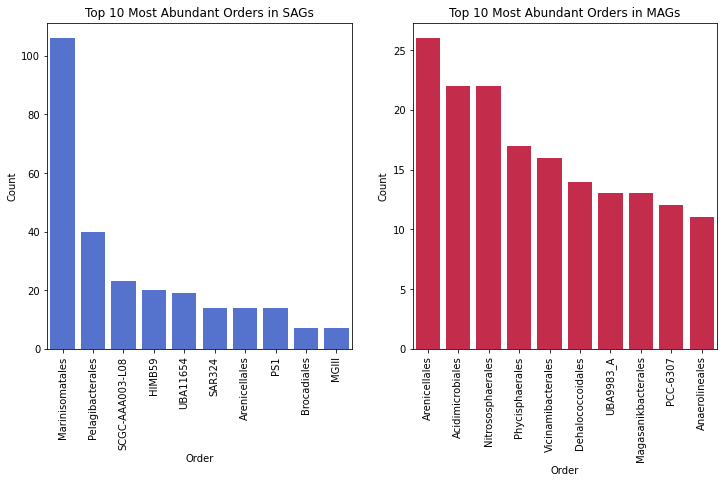

In [2]:
sag_order = sags.groupby('order', as_index=False)['well'].count().sort_values(by = 'well',ascending=False)
top_sag = sag_order [:10]

mag_order = mags.groupby('order', as_index=False)['user_genome'].count().sort_values(by = 'user_genome',ascending=False)
top_mag = mag_order [:10]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

for ax in axes:
    ax.tick_params(axis='x', rotation=90)

sns.barplot(x = 'order', y= 'well', data = top_sag, color = 'royalblue', ax = axes[0])
axes[0].set_xlabel('Order')
axes[0].set_ylabel('Count')
axes[0].set_title('Top 10 Most Abundant Orders in SAGs')

sns.barplot(x = 'order', y= 'user_genome', data = top_mag, color = 'crimson', ax = axes[1])
axes[1].set_xlabel('Order')
axes[1].set_ylabel('Count')
axes[1].set_title('Top 10 Most Abundant Orders in MAGs')

/var/folders/bk/x0sqx4rn5mzdg48mb24q8g2r0000gn/T/ipykernel_40856/1238039907.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_sag.rename(columns={'well': 'count'},inplace=True)
/var/folders/bk/x0sqx4rn5mzdg48mb24q8g2r0000gn/T/ipykernel_40856/1238039907.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_mag.rename(columns={'user_genome': 'count'},inplace=True)
/var/folders/bk/x0sqx4rn5mzdg48mb24q8g2r0000gn/T/ipykernel_40856/1238039907.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

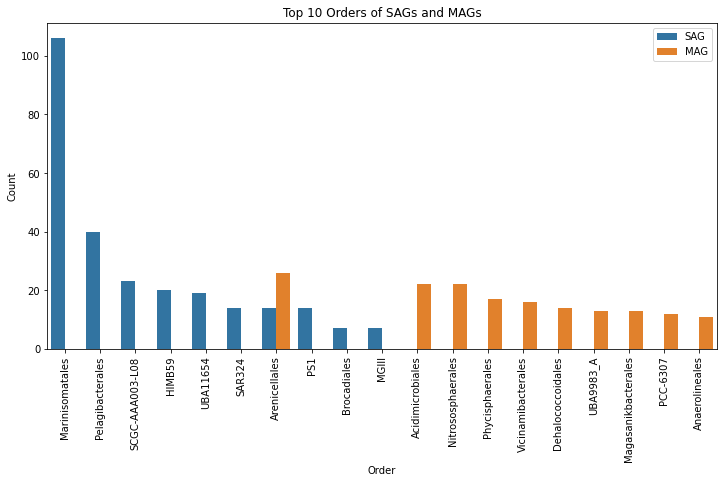

In [3]:
# Grouped Bar plot
sag_order = sags.groupby('order', as_index=False)['well'].count().sort_values(by = 'well',ascending=False)
top_sag = sag_order [:10]
top_sag.rename(columns={'well': 'count'},inplace=True)

mag_order = mags.groupby('order', as_index=False)['user_genome'].count().sort_values(by = 'user_genome',ascending=False)
top_mag = mag_order [:10]
top_mag.rename(columns={'user_genome': 'count'},inplace=True)

top_sag['group'] = 'SAG'
top_mag['group'] = 'MAG'
grouped = pd.concat([top_sag,top_mag])

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

sns.barplot(x="order", y="count", hue="group", data=grouped).tick_params(axis='x', rotation=90)
plt.xlabel('Order')
plt.ylabel('Count')
plt.title('Top 10 Orders of SAGs and MAGs')
plt.legend(title='')


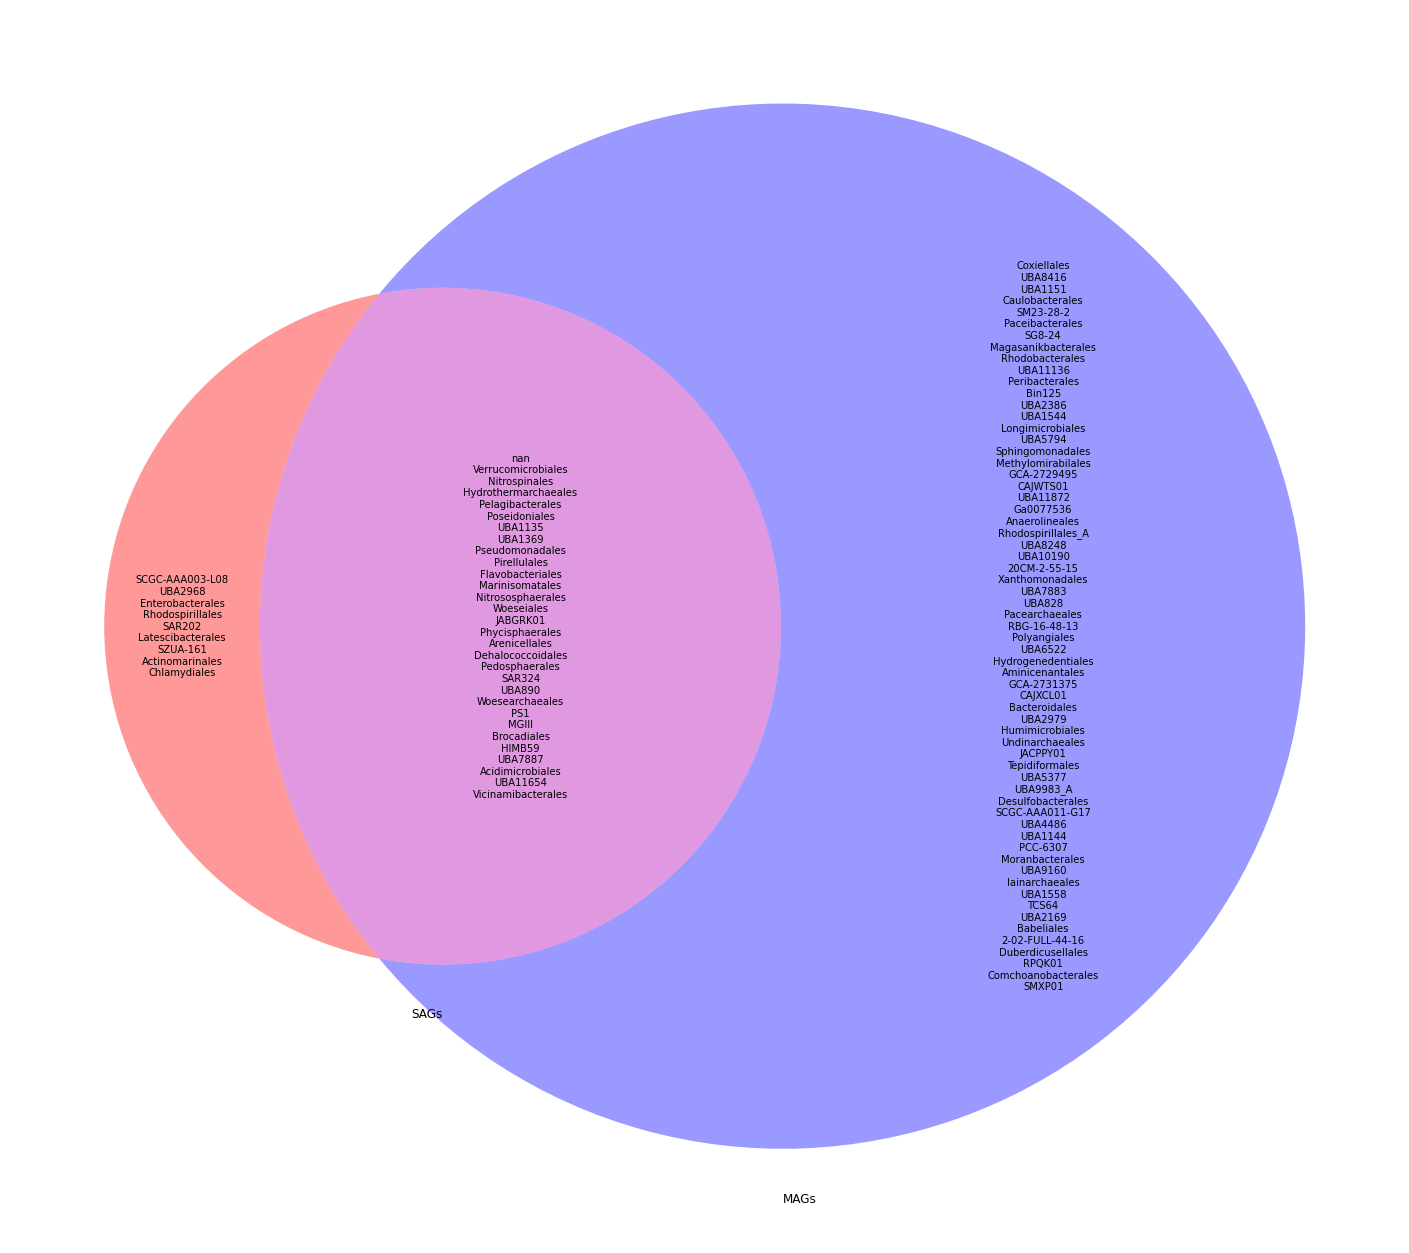

In [4]:
# venn diagram
set_A = set(sags['order'])
set_B = set(mags['order'])

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(25, 25))

# Create the Venn diagram
venn = venn2([set_A, set_B], ('SAGs', 'MAGs'),set_colors=('red', 'blue'))

# Annotate the circles with values
venn.get_label_by_id('10').set_text('\n'.join(map(str,set_A - set_B)))
venn.get_label_by_id('01').set_text('\n'.join(map(str,set_B - set_A)))
venn.get_label_by_id('11').set_text('\n'.join(map(str,set_A & set_B)))

shared = venn.get_label_by_id('11').get_text().split('\n')[2:]

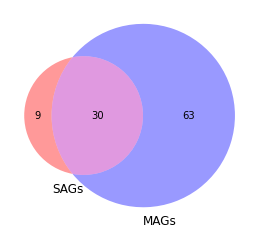

In [5]:
# later found out that one of the 30 orders in common is nan (don't know why considering I dropped NA) and another one is blank; so there are really 28 orders 
# in common

set_A = set(sags['order'])
set_B = set(mags['order'])

venn = venn2([set_A, set_B], ('SAGs', 'MAGs'),set_colors=('red', 'blue'))

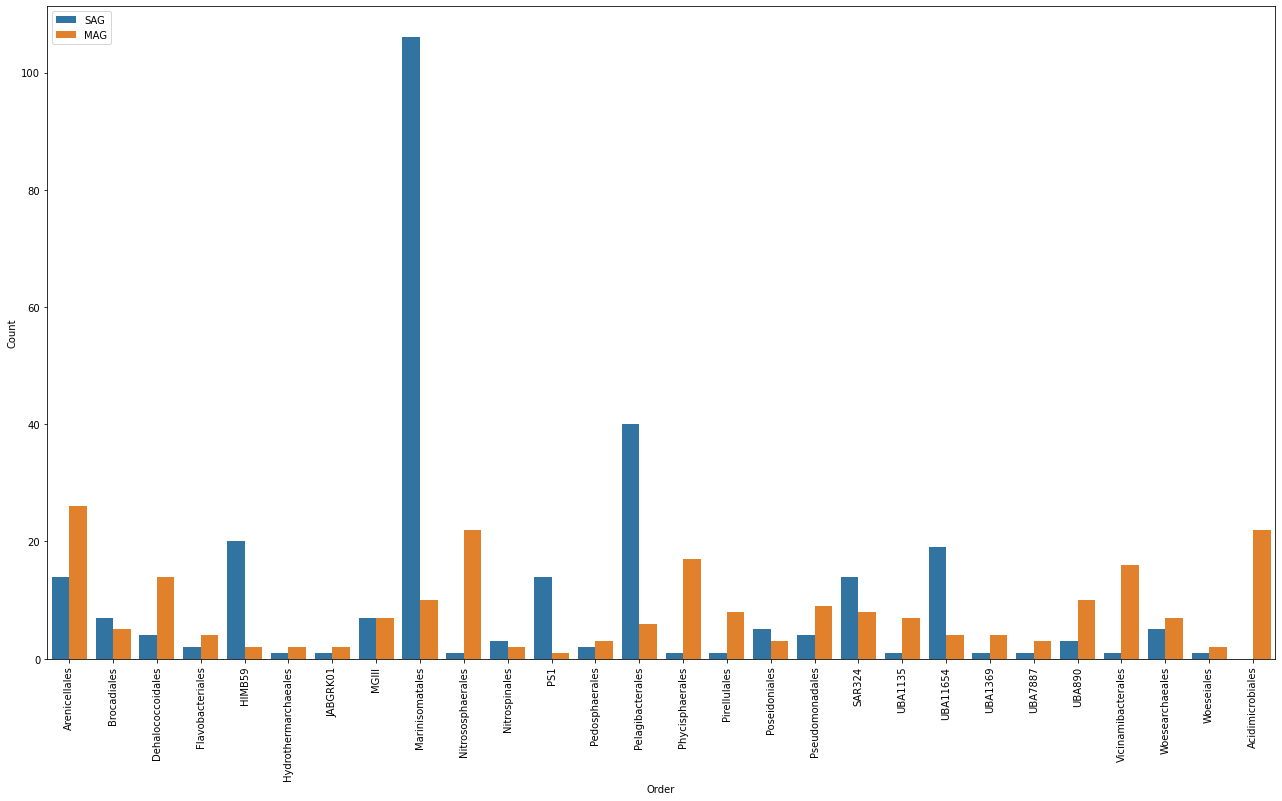

In [6]:
# run venn diagram with order names to get shared variable

sags_count = sags.groupby('order', as_index=False)['well'].count() [1:]
sags_count.rename(columns={'well': 'count'},inplace=True)
sags_count['type'] = 'SAG'

mags_count = mags.groupby('order', as_index=False)['user_genome'].count()
mags_count.rename(columns={'user_genome': 'count'},inplace=True)
mags_count['type'] = 'MAG'

combo = pd.concat([sags_count,mags_count])
combo_sub = combo[combo['order'].isin(shared)]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(22, 12))

sns.barplot(x="order", y="count", hue="type", data=combo_sub).tick_params(axis='x', rotation=90)
plt.xlabel('Order')
plt.ylabel('Count')
plt.legend(title='')

## Viruses from SAGs vs vMAGs

/var/folders/bk/x0sqx4rn5mzdg48mb24q8g2r0000gn/T/ipykernel_40856/3017556385.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_sag_virus.rename(columns={'vir_id': 'count'},inplace=True)
/var/folders/bk/x0sqx4rn5mzdg48mb24q8g2r0000gn/T/ipykernel_40856/3017556385.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_vMAGs.rename(columns={'virus_name': 'count'},inplace=True)
/var/folders/bk/x0sqx4rn5mzdg48mb24q8g2r0000gn/T/ipykernel_40856/3017556385.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

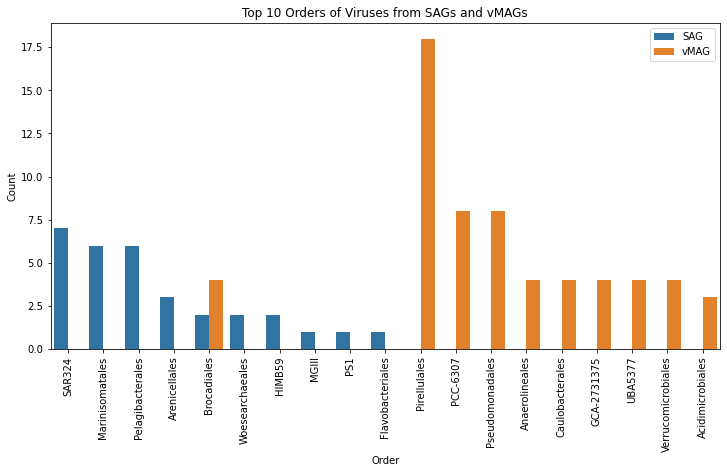

In [7]:
# Grouped Bar plot
sag_virus_order = sags_virus.groupby('order', as_index=False)['vir_id'].count().sort_values(by = 'vir_id',ascending=False)
top_sag_virus = sag_virus_order [:10]
top_sag_virus.rename(columns={'vir_id': 'count'},inplace=True)

vMAGs_order = vMAGs.groupby('order', as_index=False)['virus_name'].count().sort_values(by = 'virus_name',ascending=False)
top_vMAGs = vMAGs_order [:10]
top_vMAGs.rename(columns={'virus_name': 'count'},inplace=True)

top_sag_virus['group'] = 'SAG'
top_vMAGs['group'] = 'vMAG'
grouped = pd.concat([top_sag_virus,top_vMAGs])

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

sns.barplot(x="order", y="count", hue="group", data=grouped).tick_params(axis='x', rotation=90)
plt.xlabel('Order')
plt.ylabel('Count')
plt.title('Top 10 Orders of Viruses from SAGs and vMAGs')
plt.legend(title='')

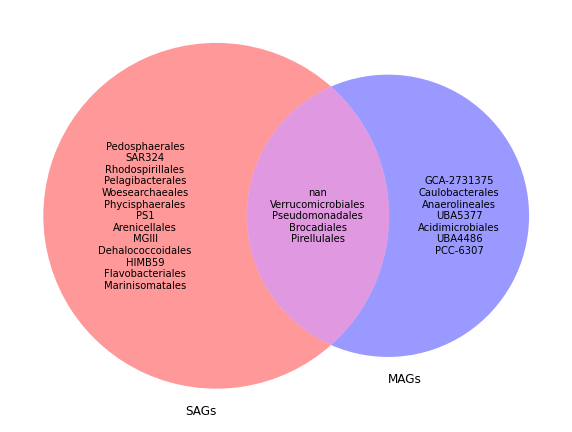

In [8]:
# venn diagram
set_A = set(sags_virus['order'])
set_B = set(vMAGs['order'])

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

# Create the Venn diagram
venn = venn2([set_A, set_B], ('SAGs', 'MAGs'),set_colors=('red', 'blue'))

# Annotate the circles with values
venn.get_label_by_id('10').set_text('\n'.join(map(str,set_A - set_B)))
venn.get_label_by_id('01').set_text('\n'.join(map(str,set_B - set_A)))
venn.get_label_by_id('11').set_text('\n'.join(map(str,set_A & set_B)))

shared_virus = venn.get_label_by_id('11').get_text().split('\n')

In [9]:
print(venn.get_label_by_id('10').get_text().split('\n'))

['Pedosphaerales', 'SAR324', 'Rhodospirillales', 'Pelagibacterales', 'Woesearchaeales', 'Phycisphaerales', 'PS1', 'Arenicellales', 'MGIII', 'Dehalococcoidales', 'HIMB59', 'Flavobacteriales', 'Marinisomatales']


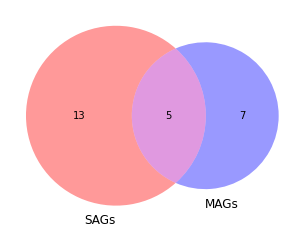

In [10]:
set_A = set(sags_virus['order'])
set_B = set(vMAGs['order'])

venn = venn2([set_A, set_B], ('SAGs', 'MAGs'),set_colors=('red', 'blue'))

In [11]:
print(shared_virus)

['nan', 'Verrucomicrobiales', 'Pseudomonadales', 'Brocadiales', 'Pirellulales']


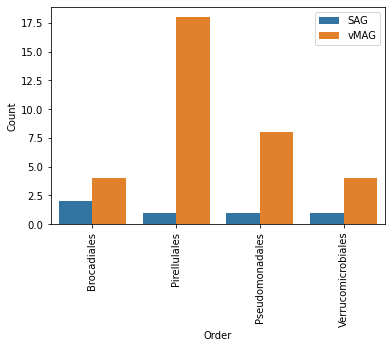

In [12]:
# run venn diagram with order names to get shared_virus variable

sags_virus_count = sags_virus.groupby('order', as_index=False)['vir_id'].count() [1:]
sags_virus_count.rename(columns={'vir_id': 'count'},inplace=True)
sags_virus_count['type'] = 'SAG'

vMAGs_count = vMAGs.groupby('order', as_index=False)['virus_name'].count()
vMAGs_count.rename(columns={'virus_name': 'count'},inplace=True)
vMAGs_count['type'] = 'vMAG'

combo_virus = pd.concat([sags_virus_count,vMAGs_count])
combo_virus_sub = combo_virus[combo_virus['order'].isin(shared_virus)]

sns.barplot(x="order", y="count", hue="type", data=combo_virus_sub).tick_params(axis='x', rotation=90)
plt.xlabel('Order')
plt.ylabel('Count')
plt.legend(title='')